# Community day

## Investigating the data

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [26]:
df = pd.read_csv('./data/cholera-dataset.csv').drop('Unnamed: 0', axis=1)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
age           303 non-null int64
sex           303 non-null object
dh            303 non-null int64
rbp           303 non-null int64
c             298 non-null float64
seizures      303 non-null int64
vc            303 non-null int64
ia            303 non-null int64
bt0           303 non-null int64
fc            303 non-null int64
exposed_to    303 non-null int64
fever         303 non-null int64
cholera       303 non-null int64
dtypes: float64(1), int64(11), object(1)
memory usage: 30.8+ KB


In [28]:
# Checking nulls
df[df['c'].isnull()]

,age,sex,dh,rbp,c,seizures,vc,ia,bt0,fc,exposed_to,fever,cholera
99,53,Male,2,130,NaN,1,0,173,0,2,3,0,1
134,41,Female,1,126,NaN,0,1,163,0,2,0,0,1
135,49,Female,0,130,NaN,0,1,163,0,2,0,0,1
260,66,Female,0,178,NaN,1,1,165,1,1,2,0,0
298,57,Female,0,140,NaN,0,1,123,1,1,0,0,0


In [29]:
# As only 5 people have NaN's but they have relevant attributes, we fill it with the mean of cholesterol.
df = df.fillna(df['c'].mean())

In [30]:
# Looking for outliers
df.describe()

,age,dh,rbp,c,seizures,vc,ia,bt0,fc,exposed_to,fever,cholera
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.283828,0.966997,131.623762,246.067114,0.148515,0.528053,149.646865,0.326733,1.399340,0.729373,0.006601,0.544554
std,9.872631,1.032052,17.538143,51.688146,0.356198,0.525860,22.905161,0.469794,0.616226,1.022606,0.081110,0.498835
min,3.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,242.000000,0.000000,1.000000,153.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,61.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,2.000000,1.000000,0.000000,1.000000
max,100.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,2.000000,4.000000,1.000000,1.000000


Half of the sample has cholera and nearly no one has fever. Few people with seizures.

# Cholera and dehydratation

In [39]:
c_and_dh1 = df.groupby(['cholera', 'dh']).count()[['age']].reset_index()
c_and_dh = c_and_dh1[c_and_dh1['cholera'] == 1]
noC_and_hd = c_and_dh1[c_and_dh1['cholera'] == 0]


AttributeError: 'module' object has no attribute 'barplot'

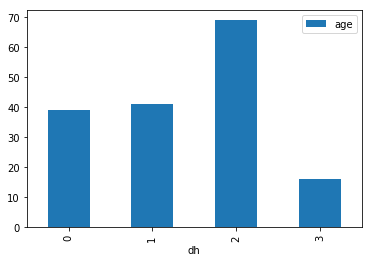

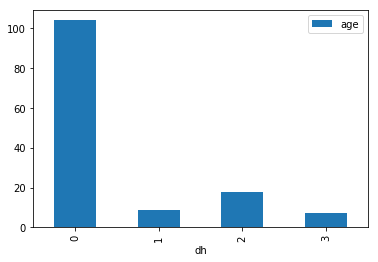

In [46]:
fig, axs = 

plot = c_and_dh.plot(kind = 'bar', x= 'dh', y='age')
plot = noC_and_hd.plot(kind = 'bar', x= 'dh', y='age')

plt.barplot(c_and_dh['dh'], c_and_hd['age'])

In [60]:
fig = plt.figure()
ax = fig.add_subplot(11)
ax.bar(noC_and_hd,noC_and_hd['age'],color='b',label='-Ymin')
ax.bar(c_and_dh,c_and_dh['age'],color='r',label='Ymax')

plt.show()


ValueError: Integer subplot specification must be a three-digit number, not 11

<Figure size 432x288 with 0 Axes>

In [61]:
df.to_csv('data1.csv')